# Imports

In [ ]:
import pandas as pd
import numpy as np

# Data Reading and Cleaning

In [ ]:
url = 'https://raw.githubusercontent.com/StatsGary/Data/main/thyroid_raw.csv'
df = pd.read_csv(url, header=None)
data = df.drop(df.iloc[:, 1:22], axis = 1)
data.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Target"]
data = data.drop(['Feature2', 'Feature4'], axis=1)
data.columns = ["Feature1", "Feature2", "Feature3", "Target"]
data = data.to_numpy()
data

array([[0.8408678952719717, -0.6384998731458282, -1.209042232192488,
        'sick'],
       [1.3322285265420328, -1.5042690021617549, 0.164048865111289,
        'negative'],
       [0.6443236427639473, -0.3329342981990303, 0.6827721685371604,
        'negative'],
       ...,
       [1.0374121477799962, 0.3800520433434972, -0.1410824898451059,
        'negative'],
       [0.939140021525984, -0.2820067023745646, -0.6903189287666168,
        'sick'],
       [0.546051516509935, 0.3800520433434972, -0.5377532512884193,
        'negative']], dtype=object)

In [ ]:
data[:, -1]

array(['sick', 'negative', 'negative', ..., 'negative', 'sick',
       'negative'], dtype=object)

In [ ]:
my_map = {'negative': 0, 'sick': 1}
data[:, -1] = np.vectorize(my_map.get)(data[:, -1])
data

array([[0.8408678952719717, -0.6384998731458282, -1.209042232192488, 1],
       [1.3322285265420328, -1.5042690021617549, 0.164048865111289, 0],
       [0.6443236427639473, -0.3329342981990303, 0.6827721685371604, 0],
       ...,
       [1.0374121477799962, 0.3800520433434972, -0.1410824898451059, 0],
       [0.939140021525984, -0.2820067023745646, -0.6903189287666168, 1],
       [0.546051516509935, 0.3800520433434972, -0.5377532512884193, 0]],
      dtype=object)

In [ ]:
df = pd.DataFrame(data, columns = ["Feature1", "Feature2", "Feature3", "Target"])
df

,Feature1,Feature2,Feature3,Target
0,0.840868,-0.6385,-1.209042,1
1,1.332229,-1.504269,0.164049,0
2,0.644324,-0.332934,0.682772,0
3,0.742596,-0.536645,-0.50724,0
4,1.528773,-0.231079,0.347128,1
...,...,...,...,...
2745,-1.665071,0.583762,-0.385188,0
2746,0.742596,0.43098,0.133536,0
2747,1.037412,0.380052,-0.141082,0
2748,0.93914,-0.282007,-0.690319,1


# Splitting of Data

In [ ]:
from sklearn import preprocessing

In [ ]:
# Spliting data into Feature and
X=df.drop('Target', axis=1)
y=df['Target']
y=y.astype('int')

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# Training Data

In [ ]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(3,3),
                    max_iter=300,
                    random_state=5,
                    verbose=True,
                    activation='logistic',
                    learning_rate_init=0.1)

In [ ]:
X_train, y_train

(      Feature1  Feature2  Feature3
 668   1.086548 -0.740355 -0.202109
 1973  -0.92803 -0.689427 -0.263135
 128   0.202099 -0.791283  -0.50724
 340  -0.092717 -0.485717  0.347128
 2045  0.890004   -0.6385  0.865851
 ...        ...       ...       ...
 1638  0.300371 -0.689427 -0.415701
 1095  1.381365 -0.078296  0.713285
 1130  0.791732  0.176342 -0.141082
 1294 -0.092717 -1.045921 -0.720832
 860  -0.485806  0.685618 -0.964937
 
 [1925 rows x 3 columns], 668     1
 1973    0
 128     1
 340     1
 2045    0
        ..
 1638    0
 1095    0
 1130    0
 1294    0
 860     1
 Name: Target, Length: 1925, dtype: int64)

In [ ]:
# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.60869700
Iteration 2, loss = 0.56264097
Iteration 3, loss = 0.55968088
Iteration 4, loss = 0.56235512
Iteration 5, loss = 0.56024376
Iteration 6, loss = 0.56102442
Iteration 7, loss = 0.56035370
Iteration 8, loss = 0.56101407
Iteration 9, loss = 0.56119814
Iteration 10, loss = 0.56140854
Iteration 11, loss = 0.56276927
Iteration 12, loss = 0.55877796
Iteration 13, loss = 0.56093092
Iteration 14, loss = 0.55953775
Iteration 15, loss = 0.55990447
Iteration 16, loss = 0.56049765
Iteration 17, loss = 0.55997653
Iteration 18, loss = 0.56214793
Iteration 19, loss = 0.55979506
Iteration 20, loss = 0.55987786
Iteration 21, loss = 0.55936420
Iteration 22, loss = 0.55849485
Iteration 23, loss = 0.55997865
Iteration 24, loss = 0.55983464
Iteration 25, loss = 0.55840093
Iteration 26, loss = 0.55827642
Iteration 27, loss = 0.55809467
Iteration 28, loss = 0.55959574
Iteration 29, loss = 0.55864758
Iteration 30, loss = 0.55799733
Iteration 31, loss = 0.55843625
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 3),
              learning_rate_init=0.1, max_iter=300, random_state=5,
              verbose=True)

In [ ]:
# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Model Evaluation

In [ ]:
# Import scikit metrics and seaborn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.744%


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       614
           1       0.00      0.00      0.00       211

    accuracy                           0.74       825
   macro avg       0.37      0.50      0.43       825
weighted avg       0.55      0.74      0.64       825



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


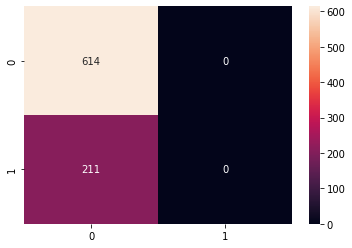

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusionMatrix, annot=True, fmt=".0f")

# Class MLP from Scratch

In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the identity activation function
def identity(x):
    return x

# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Initialize weights for the hidden and output layers
        self.weights = []
        self.biases = []
        prev_size = input_size
        for i, size in enumerate(hidden_sizes):
            self.weights.append(np.random.randn(prev_size, size))
            self.biases.append(np.random.randn(size))
            prev_size = size
        self.weights.append(np.random.randn(prev_size, output_size))
        self.biases.append(np.random.randn(output_size))

    # Define the forward pass through the network
    def forward(self, input):
        activations = [input]
        for i, weight, bias in zip(range(len(self.weights)), self.weights, self.biases):
            # Use the sigmoid activation function for hidden layers
            if i < len(self.weights) - 1:
                activation = sigmoid(np.dot(activations[i], weight) + bias)
            # Use the identity activation function for the output layer
            else:
                activation = identity(np.dot(activations[i], weight) + bias)
            activations.append(activation)
        return activations

    # Define the backward pass through the network
    def backward(self, activations, targets):
        # Compute the error for the output layer
        output_error = targets - activations[-1]

        # Backpropagate the errors to compute the gradients
        gradients = []
        for i in reversed(range(len(self.weights))):
            activation = activations[i+1]
            if i == len(self.weights) - 1:
                # Use the identity derivative for the output layer
                gradient = output_error * 1
            else:
                # Use the sigmoid derivative for hidden layers
                gradient = np.dot(self.weights[i+1], output_error) * activation * (1 - activation)
            gradients.insert(0, gradient)

        # Compute the weight and bias updates
        weight_updates = []
        bias_updates = []
        for i, (weight, bias, activation, gradient) in enumerate(zip(self.weights, self.biases, activations, gradients)):
            weight_update = np.dot(activation.T, gradient)
            bias_update = gradient


To manually compute the forward and backward pass for an epoch in a multilayer perceptron (MLP), you can use the following steps:

- Define the input data and the corresponding targets for the epoch.
- Initialize the MLP with the appropriate input size, hidden layer sizes, and output size.
- Pass the input data through the MLP using the forward() method, which computes the activations for each layer in the network.
- Compute the error for the output layer by subtracting the targets from the activations of the output layer.
- Backpropagate the errors to compute the gradients for each layer in the network.
- Update the weights and biases for each layer in the network using the computed gradients.